In [1]:
import os
from pathlib import Path
import data_loader_utils
import itertools 
from sktime.classification.kernel_based import RocketClassifier
import numpy as np

In [2]:
machines = ["M01","M02","M03"]
process_names = ["OP00","OP01","OP02","OP03","OP04","OP05","OP06","OP07","OP08","OP09","OP10","OP11","OP12","OP13","OP14"]
labels = ["good","bad"]
path_to_dataset = Path("./data/").absolute()

In [3]:
X_data = []
y_data = []

for process_name, machine, label in itertools.product(process_names, machines, labels):
    data_path = os.path.join(path_to_dataset, machine, process_name, label)
    data_list, data_label = data_loader_utils.load_tool_research_data(data_path, label=label)
    #concatenating
    X_data.extend(data_list)
    y_data.extend(data_label)

loading files from /root/workspace/github.com/Tinus1424/thesis/data/M01/OP00/good... 
skipping /root/workspace/github.com/Tinus1424/thesis/data/M01/OP00/bad empty directory...
loading files from /root/workspace/github.com/Tinus1424/thesis/data/M01/OP00/bad... 
loading files from /root/workspace/github.com/Tinus1424/thesis/data/M02/OP00/good... 
loading files from /root/workspace/github.com/Tinus1424/thesis/data/M02/OP00/bad... 
loading files from /root/workspace/github.com/Tinus1424/thesis/data/M03/OP00/good... 
skipping /root/workspace/github.com/Tinus1424/thesis/data/M03/OP00/bad empty directory...
loading files from /root/workspace/github.com/Tinus1424/thesis/data/M03/OP00/bad... 
loading files from /root/workspace/github.com/Tinus1424/thesis/data/M01/OP01/good... 
loading files from /root/workspace/github.com/Tinus1424/thesis/data/M01/OP01/bad... 
loading files from /root/workspace/github.com/Tinus1424/thesis/data/M02/OP01/good... 
loading files from /root/workspace/github.com/Tinu

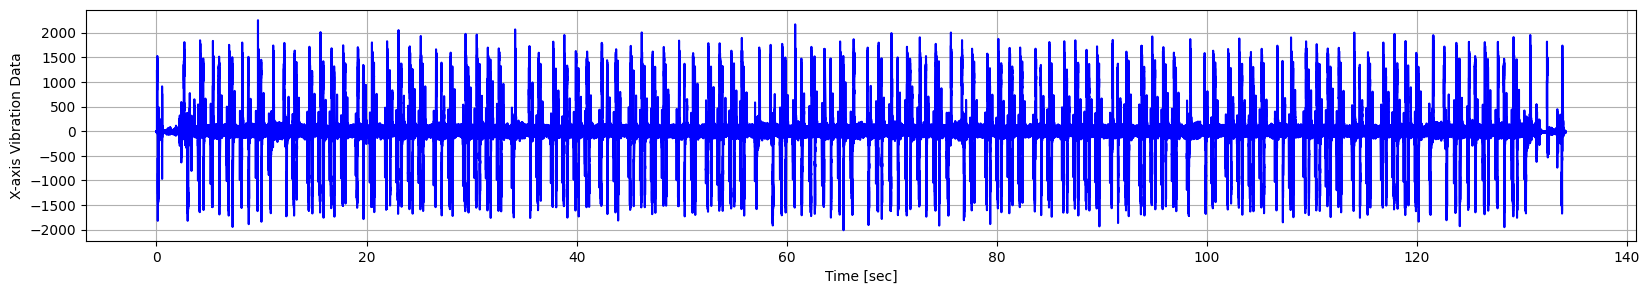

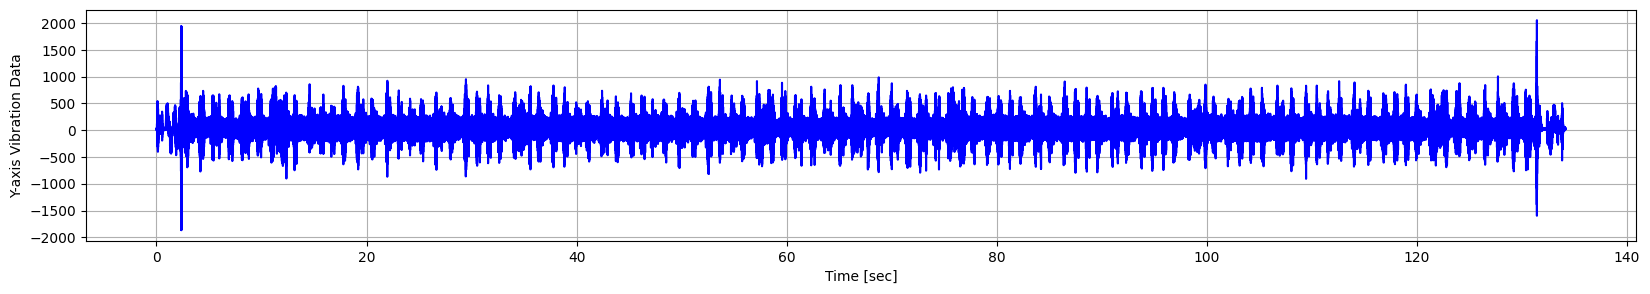

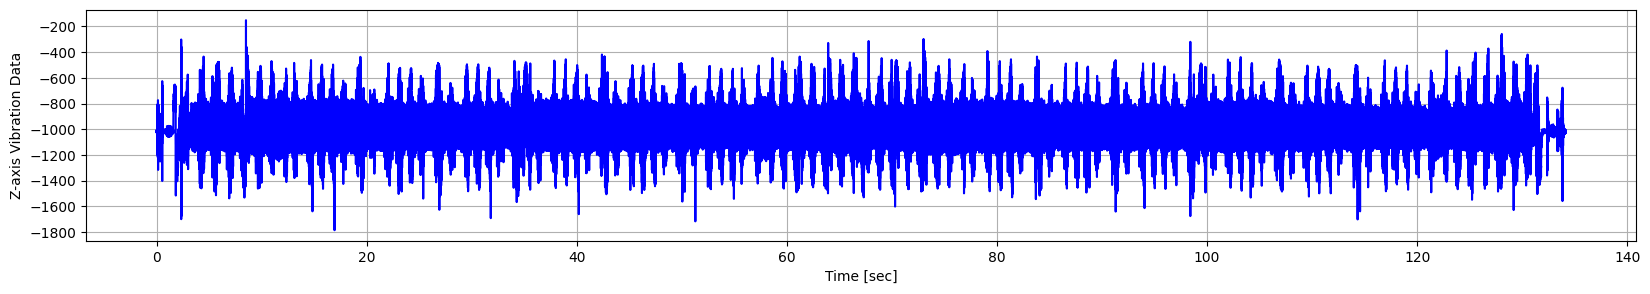

In [4]:
file = Path("./data/M01/OP00/good/M01_Aug_2019_OP00_000.h5").absolute()
sample = data_loader_utils.datafile_read(file)

In [5]:
y_new = list(map(lambda x: x.split("_")[-1], y_data))

In [6]:
X_data[0][:-2048,:].shape

(266240, 3)

In [7]:
y_use = np.array(list(map(lambda x: 0 if x == "bad" else 1, y_new)),)

In [8]:
arr = np.empty((0, 3,4096), dtype = np.float16)
y = np.empty((0,))
for example in zip(X_data[:1000], y_use[:1000]):
    window_size = 4096
    modulo = X_data[0].shape[0] % 4096
    floor = X_data[0].shape[0] // 4096
    X_new = np.reshape(X_data[0][:-modulo,:],(floor, 3, 4096))
    arr = np.concat((arr, X_new), dtype = np.float16)
    if example[1] == 0:
        y = np.concat((y, np.zeros(floor)))
    else:
        y = np.concat((y, np.ones(floor)))

In [9]:
arr = arr.astype('float16')

In [10]:
X_train, X_test = arr[:5000], arr[5000:]
y_train, y_test = y[:5000], y[5000:]

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5000, 3, 4096), (60000, 3, 4096), (5000,), (60000,))

: 

In [12]:
rocket = RocketClassifier(rocket_transform = "minirocket", use_multivariate = "yes", n_jobs = -1)
rocket.fit(X_train, y_train)

In [14]:
pred = rocket.predict(X_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])